In [3]:
# No início do notebook 03_analise_exploratoria.ipynb
import pandas as pd
import numpy as np # Útil para EDA
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para gráficos mais elaborados
import os

# Configurações para visualizações (opcional, mas melhora a aparência)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6) # Define um tamanho padrão para os gráficos

# Caminho para a pasta de dados e nome do arquivo
data_path = 'dados/' # Assumindo que seu notebook 03 está na pasta raiz do projeto
nome_arquivo = 'olist_df_merged_para_analise.csv'
caminho_completo_arquivo = os.path.join(data_path, nome_arquivo)

# Listar as colunas que sabemos que são datas para que o Pandas as parseie corretamente
colunas_de_data = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'shipping_limit_date',
    'review_creation_date', 'review_answer_timestamp'
]

# Carregar o DataFrame do arquivo CSV, especificando o parse das datas
try:
    df_merged = pd.read_csv(caminho_completo_arquivo, parse_dates=colunas_de_data)
    print(f"DataFrame df_merged carregado com sucesso de: {caminho_completo_arquivo}")
    print(f"Dimensões do df_merged carregado: {df_merged.shape}")
    
    print("\nVerificando os tipos de dados após o carregamento (especialmente as datas):")
    df_merged.info()
    
    print("\nPrimeiras linhas do df_merged carregado:")
    print(df_merged.head())
    
except FileNotFoundError:
    print(f"ERRO: O arquivo {caminho_completo_arquivo} não foi encontrado. Verifique o caminho e o nome do arquivo.")

print("\n--------------------------------------------------\n")
print("Ambiente para EDA configurado. Agora você pode executar as análises descritivas que planejamos.")

DataFrame df_merged carregado com sucesso de: dados/olist_df_merged_para_analise.csv
Dimensões do df_merged carregado: (112650, 39)

Verificando os tipos de dados após o carregamento (especialmente as datas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]


In [4]:
# Verificar o tipo de 'review_creation_date' ANTES
print("Tipo de 'review_creation_date' ANTES:", df_merged['review_creation_date'].dtype)

# Converter 'review_creation_date' para datetime
# Usamos errors='coerce' para transformar qualquer data inválida em NaT (Not a Time)
df_merged['review_creation_date'] = pd.to_datetime(df_merged['review_creation_date'], errors='coerce')

print("Tipo de 'review_creation_date' DEPOIS:", df_merged['review_creation_date'].dtype)

# Verificar novamente as informações das colunas de data para confirmar
print("\nInformações das colunas de data após correção de 'review_creation_date':")
colunas_de_data_verificacao = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'shipping_limit_date',
    'review_creation_date', 'review_answer_timestamp'
]
print(df_merged[colunas_de_data_verificacao].info())
print("\n--------------------------------------------------\n")

Tipo de 'review_creation_date' ANTES: object
Tipo de 'review_creation_date' DEPOIS: datetime64[ns]

Informações das colunas de data após correção de 'review_creation_date':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       112650 non-null  datetime64[ns]
 1   order_approved_at              112635 non-null  datetime64[ns]
 2   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 3   order_delivered_customer_date  110196 non-null  datetime64[ns]
 4   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 5   shipping_limit_date            112650 non-null  datetime64[ns]
 6   review_creation_date           98990 non-null   datetime64[ns]
 7   review_answer_timestamp        111708 non-null  datetime64[ns]
dtypes: datetime64[ns](8)
memory usag

In [5]:
# print("Revisão do df_merged - Informações Gerais:")
# df_merged.info()
# print("\nRevisão do df_merged - Primeiras 5 linhas:")
# print(df_merged.head())
# print("\n--------------------------------------------------\n")

In [6]:
print("Estatísticas Descritivas para Colunas Numéricas Chave:")
colunas_numericas_interesse = [
    'price', 'freight_value', 'payment_value_total', 
    'payment_installments_max', 'review_score', 
    'product_weight_g', 'product_photos_qty'
]
print(df_merged[colunas_numericas_interesse].describe())
print("\n--------------------------------------------------\n")

Estatísticas Descritivas para Colunas Numéricas Chave:
               price  freight_value  payment_value_total  \
count  112650.000000  112650.000000        112650.000000   
mean      120.653739      19.990320           180.276384   
std       183.633928      15.806405           272.846995   
min         0.850000       0.000000             0.000000   
25%        39.900000      13.080000            65.670000   
50%        74.990000      16.260000           114.440000   
75%       134.900000      21.150000           195.382500   
max      6735.000000     409.680000         13664.080000   

       payment_installments_max   review_score  product_weight_g  \
count             112650.000000  111708.000000     112650.000000   
mean                   3.018331       4.032854       2093.538127   
std                    2.802534       1.387526       3751.303751   
min                    0.000000       1.000000          2.000000   
25%                    1.000000       4.000000        300.000000

In [7]:
print("Estatísticas Descritivas para Colunas Categóricas/Object Chave:")
colunas_object_interesse = [
    'order_status', 'product_category_name_english', 
    'customer_state', 'seller_state'
]
print(df_merged[colunas_object_interesse].describe(include='object'))
print("\n--------------------------------------------------\n")

Estatísticas Descritivas para Colunas Categóricas/Object Chave:
       order_status product_category_name_english customer_state seller_state
count        112650                        112650         112650       112650
unique            7                            74             27           23
top       delivered                bed_bath_table             SP           SP
freq         110197                         11115          47449        80342

--------------------------------------------------



In [8]:
print("Período Coberto pelos Pedidos no df_merged:")
min_data_pedido = df_merged['order_purchase_timestamp'].min()
max_data_pedido = df_merged['order_purchase_timestamp'].max()

print(f"Data do primeiro pedido: {min_data_pedido}")
print(f"Data do último pedido: {max_data_pedido}")
print(f"Período total coberto: {max_data_pedido - min_data_pedido}")
print("\n--------------------------------------------------\n")

Período Coberto pelos Pedidos no df_merged:
Data do primeiro pedido: 2016-09-04 21:15:19
Data do último pedido: 2018-09-03 09:06:57
Período total coberto: 728 days 11:51:38

--------------------------------------------------



In [9]:
# Extrair o ano da data da compra
df_merged['order_purchase_year'] = df_merged['order_purchase_timestamp'].dt.year

# Extrair o mês da data da compra
df_merged['order_purchase_month'] = df_merged['order_purchase_timestamp'].dt.month

# Criar uma coluna combinada 'ano_mes' no formato AAAA-MM para facilitar o agrupamento e visualização.
# Usaremos o método .dt.to_period('M') que cria um objeto do tipo Period, 
# ideal para representar períodos mensais e que ordena corretamente em gráficos.
df_merged['order_purchase_year_month'] = df_merged['order_purchase_timestamp'].dt.to_period('M')

# Exibir as primeiras linhas com as novas colunas para verificação
print("Primeiras linhas do df_merged com as novas colunas de ano e mês:")
colunas_para_mostrar_datas = ['order_id', 'order_purchase_timestamp', 'order_purchase_year', 
                              'order_purchase_month', 'order_purchase_year_month']
print(df_merged[colunas_para_mostrar_datas].head())
print("\n--------------------------------------------------\n")

# Verificar os tipos de dados das novas colunas
print("Tipos de dados das novas colunas de data:")
print(df_merged[['order_purchase_year', 'order_purchase_month', 'order_purchase_year_month']].info())
print("\n--------------------------------------------------\n")

Primeiras linhas do df_merged com as novas colunas de ano e mês:
                           order_id order_purchase_timestamp  \
0  e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   
1  53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37   
2  47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49   
3  949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   
4  ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   

   order_purchase_year  order_purchase_month order_purchase_year_month  
0                 2017                    10                   2017-10  
1                 2018                     7                   2018-07  
2                 2018                     8                   2018-08  
3                 2017                    11                   2017-11  
4                 2018                     2                   2018-02  

--------------------------------------------------

Tipos de dados das novas colunas de data:
<class 'pandas.co

Tendência Mensal de Pedidos Únicos e Valor Total de Vendas:
  order_purchase_year_month  num_pedidos_unicos  valor_total_vendas
0                   2016-09                   3              211.29
1                   2016-10                 308            56884.89
2                   2016-12                   1               19.62
3                   2017-01                 789           137251.79
4                   2017-02                1733           286340.87
...
   order_purchase_year_month  num_pedidos_unicos  valor_total_vendas
19                   2018-05                6853          1149843.99
20                   2018-06                6160          1022789.50
21                   2018-07                6273          1058824.61
22                   2018-08                6452          1003231.11
23                   2018-09                   1              166.46

--------------------------------------------------



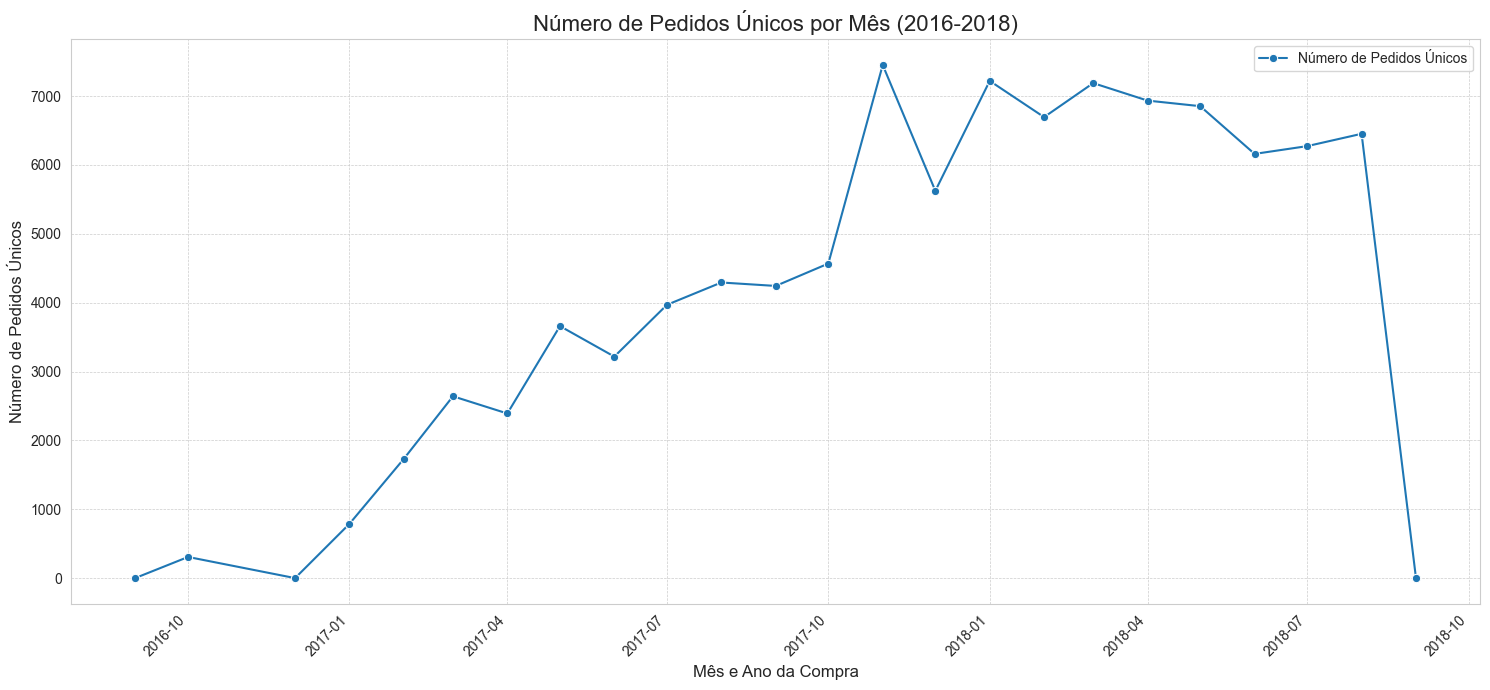

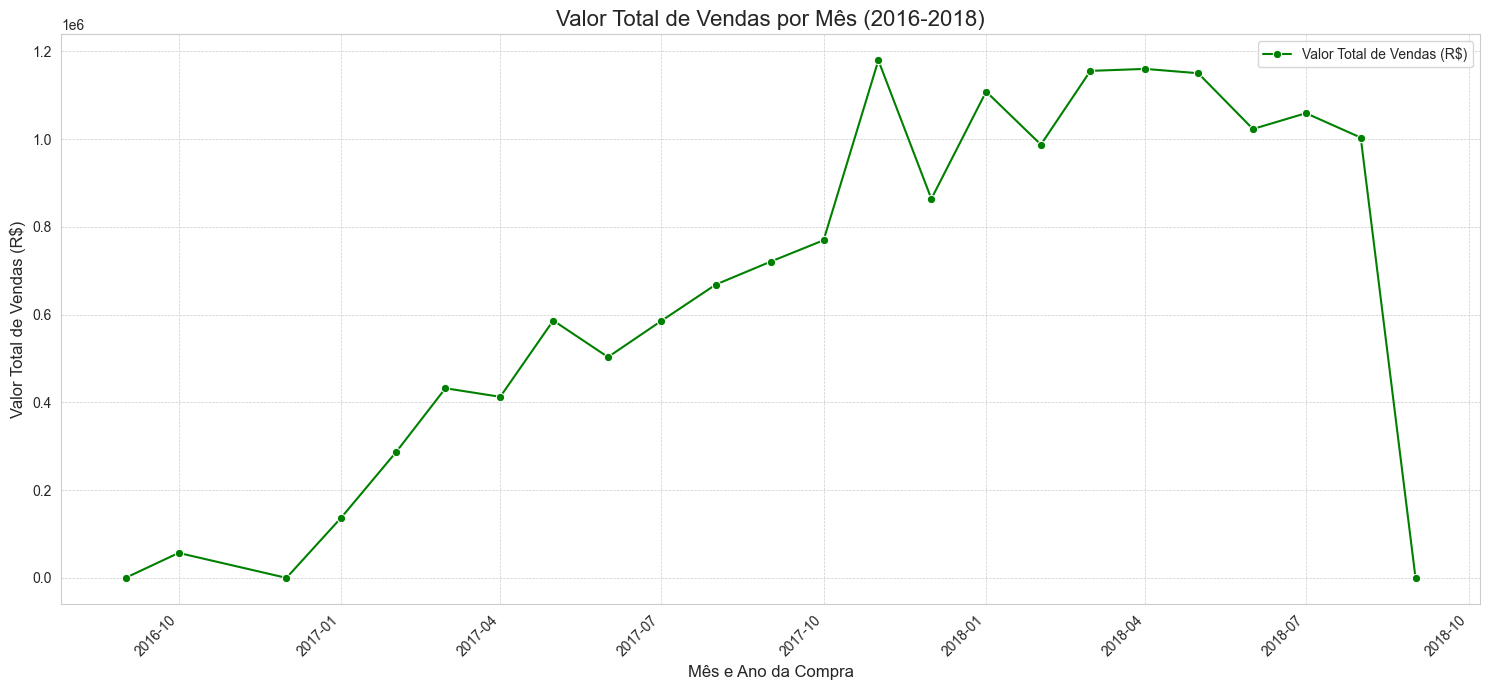

In [10]:
# 1. Calcular o número de pedidos únicos por mês
# Agrupamos por 'order_purchase_year_month' e contamos o número de 'order_id' distintos
pedidos_unicos_mensais_df = df_merged.groupby('order_purchase_year_month')['order_id'].nunique().reset_index(name='num_pedidos_unicos')

# 2. Calcular o valor total de vendas por mês
# Primeiro, criamos um DataFrame temporário com uma entrada única por pedido para o valor total e o mês/ano
df_info_pedidos_para_vendas = df_merged[['order_id', 'order_purchase_year_month', 'payment_value_total']].drop_duplicates(subset=['order_id'])
# Agora, agrupamos este DataFrame pelo mês/ano e somamos o valor total dos pagamentos
vendas_mensais_valor_df = df_info_pedidos_para_vendas.groupby('order_purchase_year_month')['payment_value_total'].sum().reset_index(name='valor_total_vendas')

# 3. Juntar as duas métricas (número de pedidos e valor das vendas) em um único DataFrame
df_tendencia_mensal = pd.merge(
    pedidos_unicos_mensais_df, 
    vendas_mensais_valor_df, 
    on='order_purchase_year_month'
)

# Exibir as primeiras e últimas linhas da tendência mensal
print("Tendência Mensal de Pedidos Únicos e Valor Total de Vendas:")
print(df_tendencia_mensal.head())
print("...")
print(df_tendencia_mensal.tail())
print("\n--------------------------------------------------\n")

# 4. Visualizar as tendências

# Gráfico para Número de Pedidos Únicos por Mês
plt.figure(figsize=(15, 7)) # Ajustando o tamanho da figura
# Usamos .to_timestamp() para converter o PeriodIndex para DatetimeIndex,
# o que melhora a formatação dos rótulos no eixo x pelo Matplotlib/Seaborn.
sns.lineplot(x='order_purchase_year_month', y='num_pedidos_unicos', data=df_tendencia_mensal.set_index('order_purchase_year_month').to_timestamp().reset_index(), marker='o', label='Número de Pedidos Únicos')
plt.title('Número de Pedidos Únicos por Mês (2016-2018)', fontsize=16)
plt.xlabel('Mês e Ano da Compra', fontsize=12)
plt.ylabel('Número de Pedidos Únicos', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # Adiciona grade
plt.legend()
plt.tight_layout() # Ajusta o layout para garantir que tudo caiba bem
plt.show()

# Gráfico para Valor Total de Vendas por Mês
plt.figure(figsize=(15, 7))
sns.lineplot(x='order_purchase_year_month', y='valor_total_vendas', data=df_tendencia_mensal.set_index('order_purchase_year_month').to_timestamp().reset_index(), marker='o', color='green', label='Valor Total de Vendas (R$)')
plt.title('Valor Total de Vendas por Mês (2016-2018)', fontsize=16)
plt.xlabel('Mês e Ano da Compra', fontsize=12)
plt.ylabel('Valor Total de Vendas (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Certifique-se de que df_tendencia_mensal existe e contém as colunas
# 'valor_total_vendas' e 'num_pedidos_unicos'.

# 1. Calcular o Ticket Médio Mensal
df_tendencia_mensal['ticket_medio_mensal'] = df_tendencia_mensal['valor_total_vendas'] / df_tendencia_mensal['num_pedidos_unicos']

# O número mínimo de pedidos únicos que vimos foi 1, então não teremos divisão por zero.
# Se houvesse risco de num_pedidos_unicos ser 0, precisaríamos tratar NaNs ou infinitos:
# import numpy as np
# df_tendencia_mensal['ticket_medio_mensal'].replace([np.inf, -np.inf], np.nan, inplace=True)
# df_tendencia_mensal['ticket_medio_mensal'].fillna(0, inplace=True)

# Exibir as primeiras e últimas linhas do df_tendencia_mensal com a nova coluna
print("Tendência Mensal de Vendas com Ticket Médio:")
print(df_tendencia_mensal.head())
print("...")
print(df_tendencia_mensal.tail())
print("\n--------------------------------------------------\n")

# Verificar estatísticas descritivas para o ticket médio
print("Estatísticas Descritivas para o Ticket Médio Mensal:")
print(df_tendencia_mensal['ticket_medio_mensal'].describe())
print("\n--------------------------------------------------\n")

Tendência Mensal de Vendas com Ticket Médio:
  order_purchase_year_month  num_pedidos_unicos  valor_total_vendas  \
0                   2016-09                   3              211.29   
1                   2016-10                 308            56884.89   
2                   2016-12                   1               19.62   
3                   2017-01                 789           137251.79   
4                   2017-02                1733           286340.87   

   ticket_medio_mensal  
0            70.430000  
1           184.691201  
2            19.620000  
3           173.956641  
4           165.228430  
...
   order_purchase_year_month  num_pedidos_unicos  valor_total_vendas  \
19                   2018-05                6853          1149843.99   
20                   2018-06                6160          1022789.50   
21                   2018-07                6273          1058824.61   
22                   2018-08                6452          1003231.11   
23            

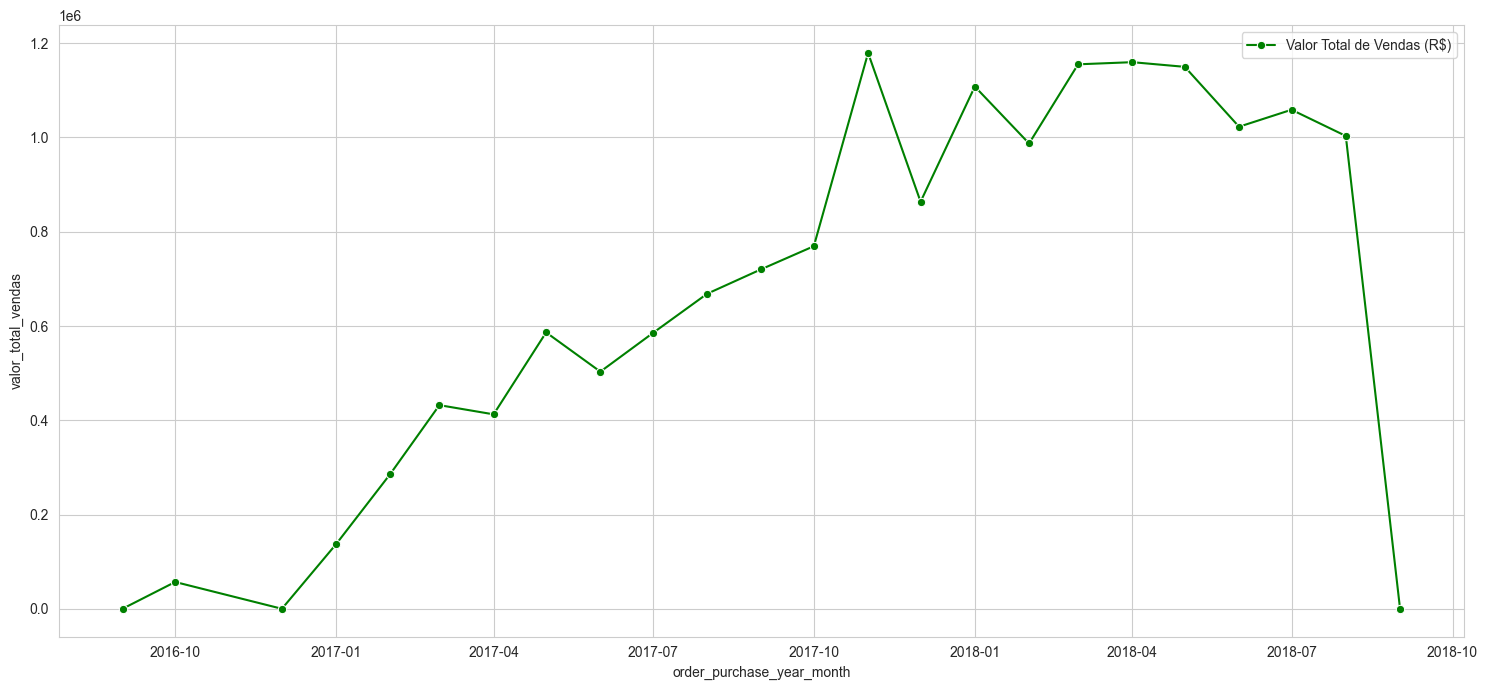

In [21]:
# ... (código para garantir que df_tendencia_mensal está pronto) ...

# Código para plotar o gráfico de VALOR TOTAL DE VENDAS
plt.figure(figsize=(15, 7))
sns.lineplot(x='order_purchase_year_month', y='valor_total_vendas', data=df_tendencia_mensal.set_index('order_purchase_year_month').to_timestamp().reset_index(), marker='o', color='green', label='Valor Total de Vendas (R$)')
# ... (plt.title, plt.xlabel, etc.) ...
plt.tight_layout()

# 1. SALVAR o gráfico primeiro:
caminho_salvar_grafico2 = os.path.join('visualizacoes', '02_tendencia_valor_vendas_mes.png')
plt.savefig(caminho_salvar_grafico2, bbox_inches='tight', dpi=150)

# 2. DEPOIS mostrar o gráfico:
plt.show()

C:\Users\tiago\AppData\Local\Temp\ipykernel_12376\3353742051.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


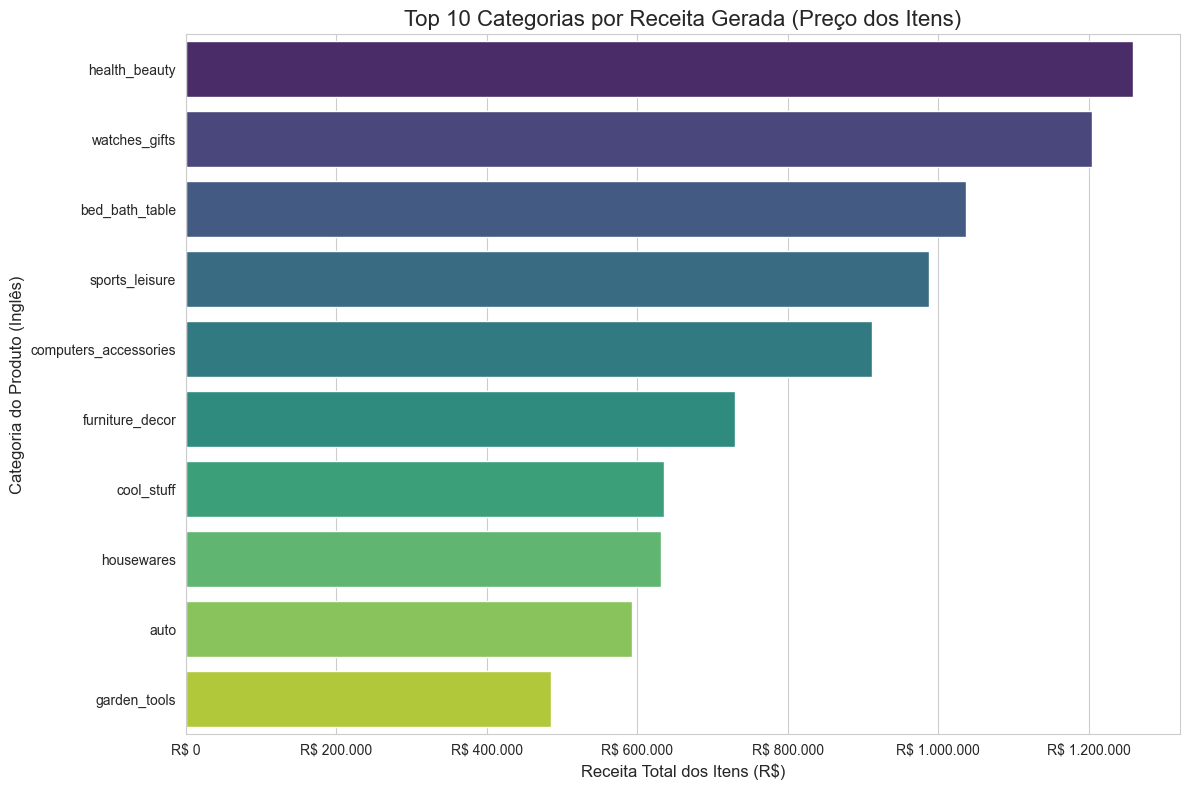

C:\Users\tiago\AppData\Local\Temp\ipykernel_12376\4102736826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


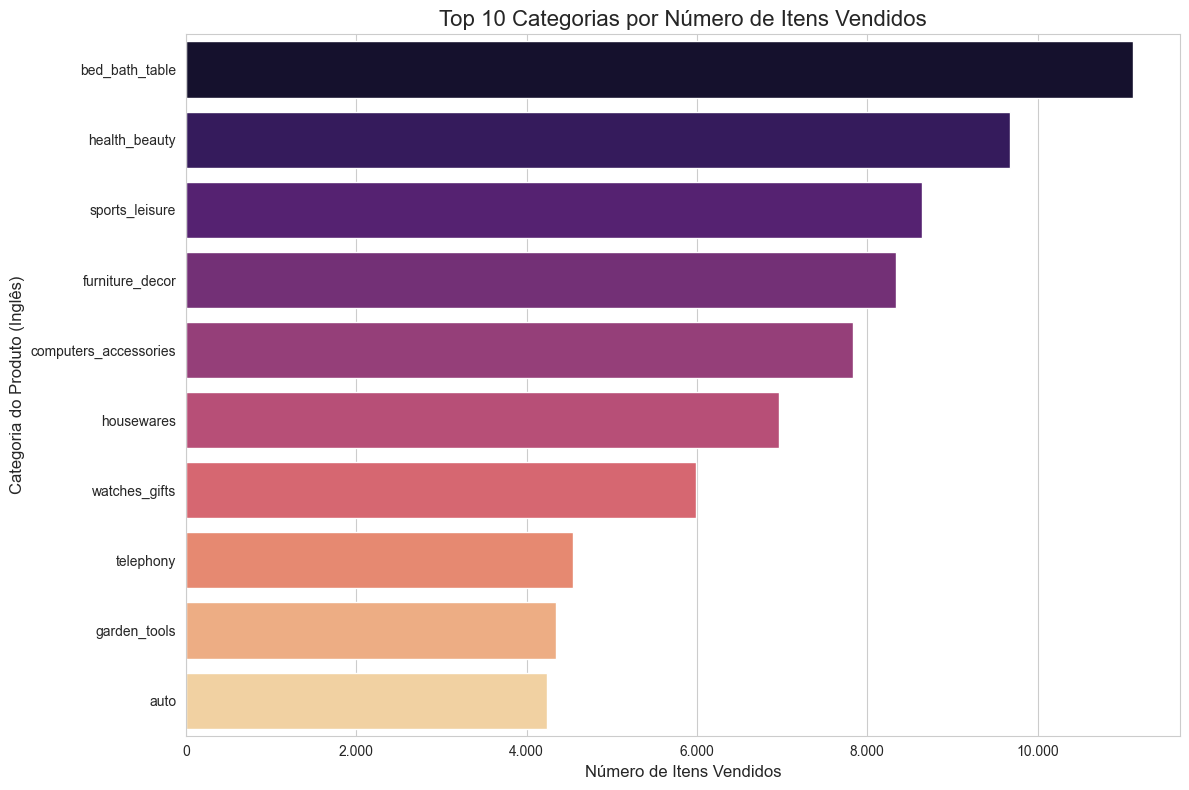

In [17]:
# No notebook 03_analise_exploratoria.ipynb

# Recriar/Garantir que itens_vendidos_por_categoria_df existe:
itens_vendidos_por_categoria_df = df_merged.groupby('product_category_name_english').size().sort_values(ascending=False).reset_index(name='num_itens_vendidos')

# Agora o código para plotar e salvar:
plt.figure(figsize=(12, 8))
sns.barplot(
    x='num_itens_vendidos', 
    y='product_category_name_english', 
    data=itens_vendidos_por_categoria_df.head(10),
    palette='magma'
)
plt.title('Top 10 Categorias por Número de Itens Vendidos', fontsize=16)
plt.xlabel('Número de Itens Vendidos', fontsize=12)
plt.ylabel('Categoria do Produto (Inglês)', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:,.0f}'.replace(',', '.')))
plt.tight_layout()

# Salvar o gráfico
caminho_salvar_grafico5 = os.path.join('visualizacoes', '05_top10_categorias_itens_vendidos.png')
plt.savefig(caminho_salvar_grafico5, bbox_inches='tight', dpi=150)

plt.show()

C:\Users\tiago\AppData\Local\Temp\ipykernel_12376\3509322330.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


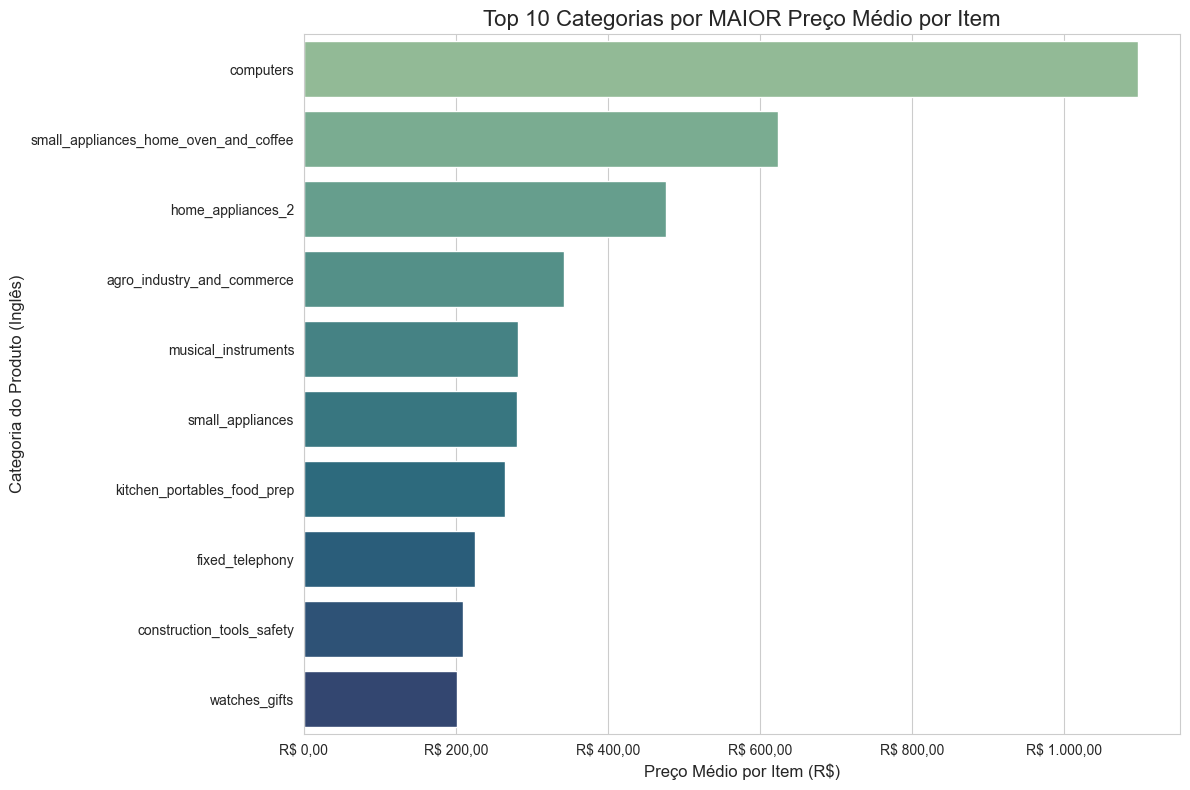

C:\Users\tiago\AppData\Local\Temp\ipykernel_12376\3509322330.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


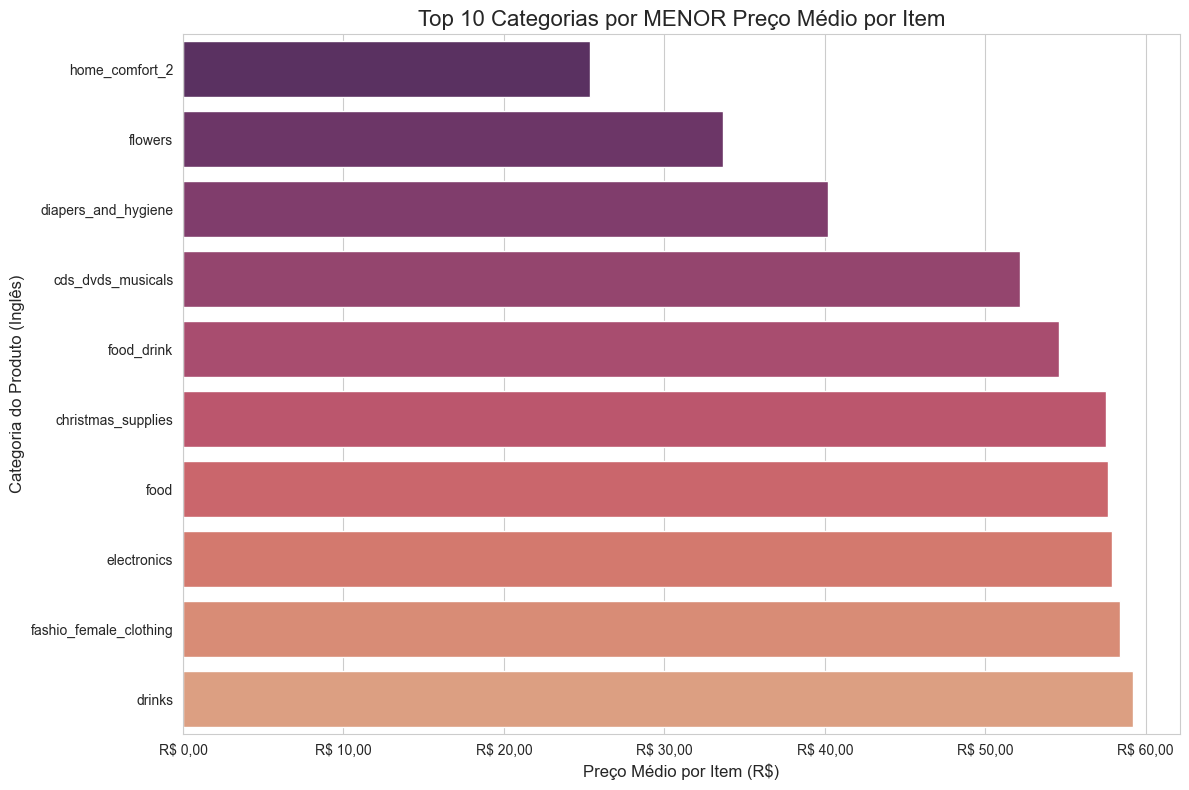

In [18]:
# No notebook 03_analise_exploratoria.ipynb

# Recriar/Garantir que receita_por_categoria_df e itens_vendidos_por_categoria_df existem
# (Estes já devem existir das etapas anteriores, mas podemos recriá-los por segurança se necessário)
# receita_por_categoria_df = df_merged.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).reset_index(name='receita_total_itens')
# itens_vendidos_por_categoria_df = df_merged.groupby('product_category_name_english').size().sort_values(ascending=False).reset_index(name='num_itens_vendidos')

# 1. Juntar as informações de receita e número de itens por categoria (se df_metricas_categoria não existir ou precisar ser recriado)
df_metricas_categoria = pd.merge(
    receita_por_categoria_df, # Gerado no passo do gráfico 4
    itens_vendidos_por_categoria_df, # Gerado no passo do gráfico 5
    on='product_category_name_english'
)

# 2. Calcular o Preço Médio por Item para cada categoria (se não existir ou precisar ser recriado)
df_metricas_categoria['preco_medio_por_item'] = df_metricas_categoria['receita_total_itens'] / df_metricas_categoria['num_itens_vendidos']

# 3. Criar os DataFrames ordenados
df_maior_preco_medio = df_metricas_categoria.sort_values(by='preco_medio_por_item', ascending=False)
df_menor_preco_medio = df_metricas_categoria.sort_values(by='preco_medio_por_item', ascending=True)

# Agora o código para plotar e salvar o gráfico de MAIOR Preço Médio:
plt.figure(figsize=(12, 8))
sns.barplot(
    x='preco_medio_por_item',
    y='product_category_name_english',
    data=df_maior_preco_medio.head(10),
    palette='crest'
)
plt.title('Top 10 Categorias por MAIOR Preço Médio por Item', fontsize=16)
plt.xlabel('Preço Médio por Item (R$)', fontsize=12)
plt.ylabel('Categoria do Produto (Inglês)', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R$ {x:,.2f}'.replace(',', '#').replace('.', ',').replace('#', '.')))
plt.tight_layout()

# Salvar o gráfico
caminho_salvar_grafico6 = os.path.join('visualizacoes', '06_top10_categorias_maior_preco_medio.png')
plt.savefig(caminho_salvar_grafico6, bbox_inches='tight', dpi=150)

plt.show()


# Código para plotar e salvar o gráfico de MENOR Preço Médio:
plt.figure(figsize=(12, 8))
sns.barplot(
    x='preco_medio_por_item',
    y='product_category_name_english',
    data=df_menor_preco_medio.head(10),
    palette='flare_r' 
)
plt.title('Top 10 Categorias por MENOR Preço Médio por Item', fontsize=16)
plt.xlabel('Preço Médio por Item (R$)', fontsize=12)
plt.ylabel('Categoria do Produto (Inglês)', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R$ {x:,.2f}'.replace(',', '#').replace('.', ',').replace('#', '.')))
plt.tight_layout()

# Salvar o gráfico
caminho_salvar_grafico6b = os.path.join('visualizacoes', '06b_top10_categorias_menor_preco_medio.png')
plt.savefig(caminho_salvar_grafico6b, bbox_inches='tight', dpi=150)

plt.show()

C:\Users\tiago\AppData\Local\Temp\ipykernel_12376\440866879.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


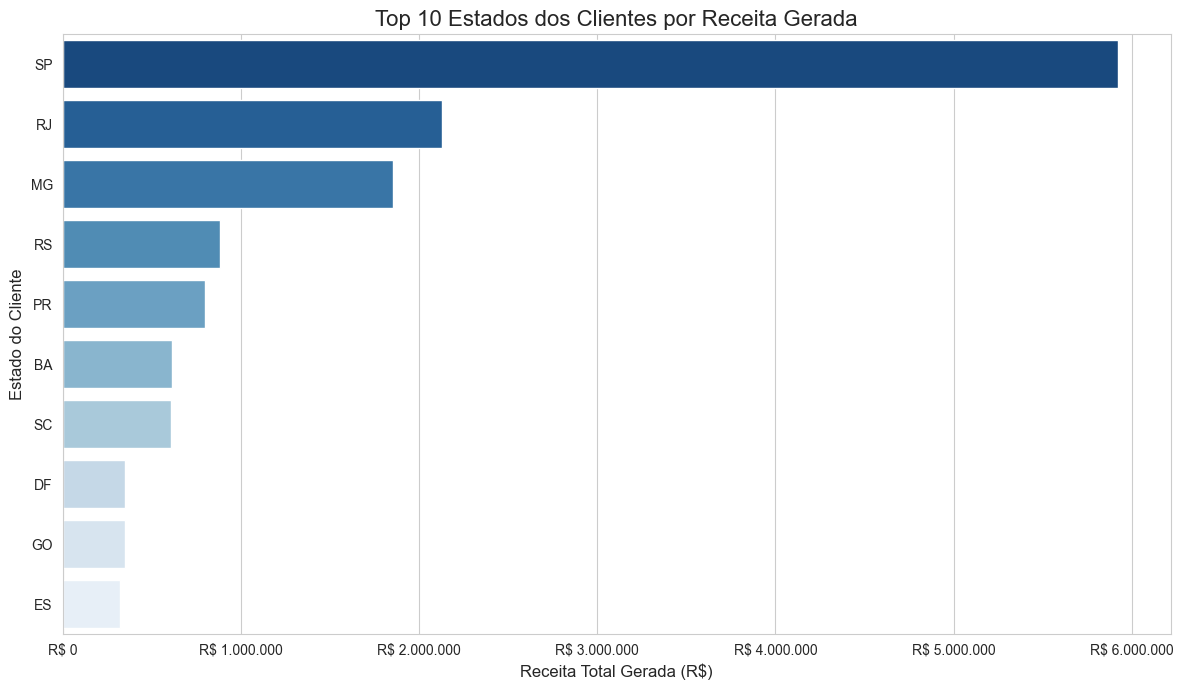

C:\Users\tiago\AppData\Local\Temp\ipykernel_12376\440866879.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


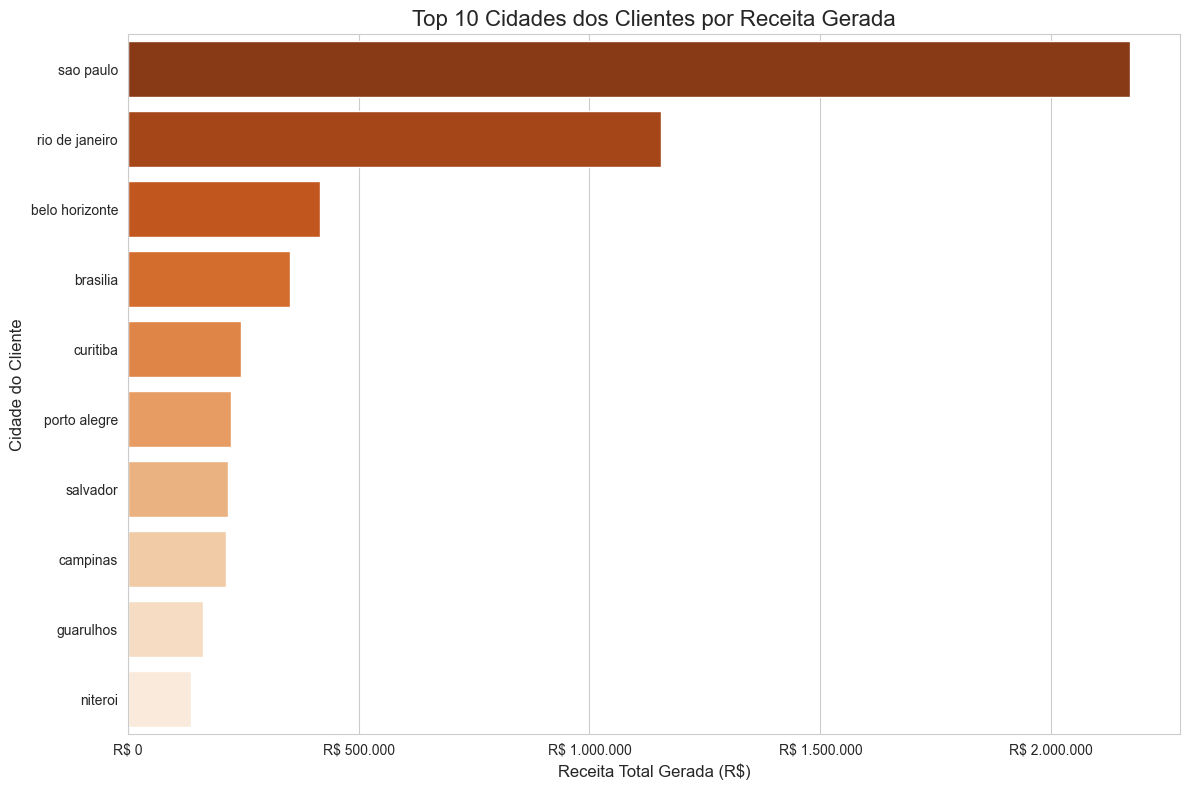

In [19]:
# No notebook 03_analise_exploratoria.ipynb

# Recriar/Garantir que df_pedidos_local_receita existe:
df_pedidos_local_receita = df_merged[[
    'order_id', 
    'customer_state', 
    'customer_city', 
    'payment_value_total'
]].drop_duplicates(subset=['order_id'])

# Recriar/Garantir que receita_por_estado_df existe:
receita_por_estado_df = df_pedidos_local_receita.groupby('customer_state')['payment_value_total'].sum().sort_values(ascending=False).reset_index(name='receita_total_estado')

# Recriar/Garantir que receita_por_cidade_df existe:
receita_por_cidade_df = df_pedidos_local_receita.groupby('customer_city')['payment_value_total'].sum().sort_values(ascending=False).reset_index(name='receita_total_cidade')


# Agora o código para plotar e salvar o gráfico de Estados:
plt.figure(figsize=(12, 7))
sns.barplot(
    x='receita_total_estado', 
    y='customer_state', 
    data=receita_por_estado_df.head(10),
    palette='Blues_r' 
)
plt.title('Top 10 Estados dos Clientes por Receita Gerada', fontsize=16)
plt.xlabel('Receita Total Gerada (R$)', fontsize=12)
plt.ylabel('Estado do Cliente', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'R$ {x:,.0f}'.replace(',', '.')))
plt.tight_layout()

# Salvar o gráfico
caminho_salvar_grafico7 = os.path.join('visualizacoes', '07_top10_estados_clientes_receita.png')
plt.savefig(caminho_salvar_grafico7, bbox_inches='tight', dpi=150)

plt.show()


# Código para plotar e salvar o gráfico de Cidades:
plt.figure(figsize=(12, 8)) 
sns.barplot(
    x='receita_total_cidade', 
    y='customer_city', 
    data=receita_por_cidade_df.head(10),
    palette='Oranges_r'
)
plt.title('Top 10 Cidades dos Clientes por Receita Gerada', fontsize=16)
plt.xlabel('Receita Total Gerada (R$)', fontsize=12)
plt.ylabel('Cidade do Cliente', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'R$ {x:,.0f}'.replace(',', '.')))
plt.tight_layout()

# Salvar o gráfico
caminho_salvar_grafico8 = os.path.join('visualizacoes', '08_top10_cidades_clientes_receita.png')
plt.savefig(caminho_salvar_grafico8, bbox_inches='tight', dpi=150)

plt.show()

C:\Users\tiago\AppData\Local\Temp\ipykernel_12376\2792786850.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


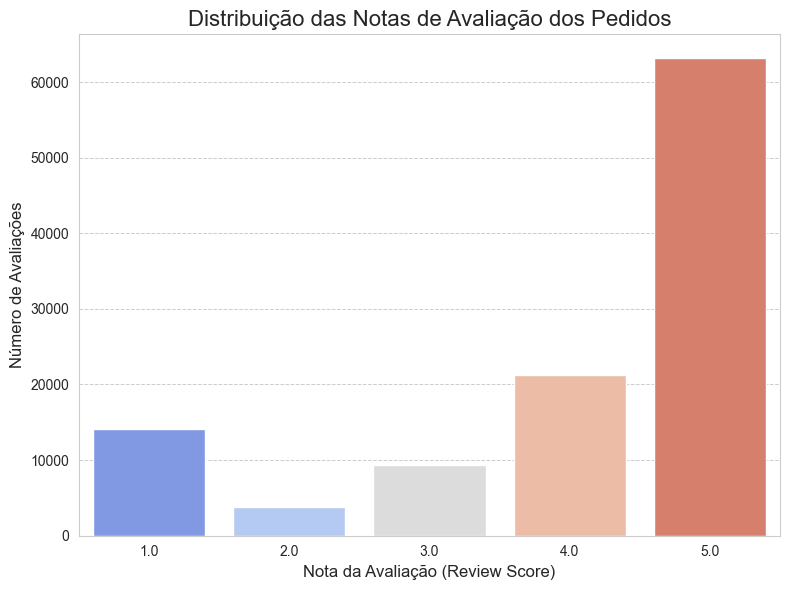

In [20]:
# No notebook 03_analise_exploratoria.ipynb

# Gráfico da Distribuição das Notas de Avaliação
plt.figure(figsize=(8, 6))
# Usamos .dropna() para remover os NaNs da coluna 'review_score' antes de plotar,
# pois o countplot contaria os NaNs como uma categoria separada se não fossem removidos.
sns.countplot(
    data=df_merged.dropna(subset=['review_score']), 
    x='review_score', 
    palette='coolwarm', 
    order=[1.0, 2.0, 3.0, 4.0, 5.0] # Garante a ordem correta das barras
)
plt.title('Distribuição das Notas de Avaliação dos Pedidos', fontsize=16)
plt.xlabel('Nota da Avaliação (Review Score)', fontsize=12)
plt.ylabel('Número de Avaliações', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Salvar o gráfico
caminho_salvar_grafico9 = os.path.join('visualizacoes', '09_distribuicao_review_score.png')
plt.savefig(caminho_salvar_grafico9, bbox_inches='tight', dpi=150)

plt.show()